In [25]:
import json
import pandas as pd
import ast
import os
import matplotlib.pyplot as plt
from datetime import datetime
import pytz

In [16]:
# Load the JSON data
with open("../corona-out-3", "r") as f1:
    data = []
    #count = 0
    for line in f1:
            #if count == 100:
                #break
            try:
                item = json.loads(line)
                data.append(item)
            #    count += 1

            except:
                # if there is an error loading the json of the tweet, skip
                continue

In [17]:
tweets = []
users = []
#count = 0
for tweet in data :
            #print(count)
            #print("---------------")
            tweet_id = tweet['id']
            created_at = tweet['created_at']
            in_reply_to_status_id = tweet['in_reply_to_status_id']
            in_reply_to_user_id = tweet['in_reply_to_user_id']
            source = tweet['source']  
            
            #####################user information############
            user_id = tweet['user']['id']
            user_name = tweet['user']['name']
            screen_name = tweet['user']['screen_name']
            location = tweet['user']['location']
            description = tweet['user']['description']
            verified =  tweet['user']['verified'] 
            followers_count = tweet['user']['followers_count'] 
            friends_count = tweet['user']['friends_count'] 
            listed_count = tweet['user']['listed_count'] 
            favourites_count =  tweet['user']['favourites_count'] 
            statuses_count =  tweet['user']['statuses_count']
            twitter_join_date = tweet['user']['created_at']
            preferred_language = tweet['user']['lang']
            following = tweet['user']['following']
             ##################### Segregate Tetweets, Tweets and Quoted Tweets information############
               
               
            if (tweet['text'].startswith('RT')):
               
                
                tweet_type = 'RT'
               
                #try adding extended tweet if it exists
                try:
                    text = tweet['retweeted_status']['extended_tweet']['full_text']  
                    retweet_fav = tweet['retweeted_status']['extended_tweet']['favorite_count'] 
                except : 
                    try:
                        text = tweet['retweeted_status']['text']
                    except: 
                        continue
                    
                 #try getting quoted text if it exists
                try:
                    quoted_text = tweet['quoted_status']['text'] 
                except : 
                    quoted_text = None   
                
                try :
                    original_tweet_id = tweet['retweeted_status']['id']
                    original_tweet_user_id = tweet['retweeted_status']['user']['id']
                except :
                    original_tweet_id = None
                    original_tweet_user_id = None
                    
                    
                    
                    #if it is a retweet, get the retweet count of the original tweet 
                    
                #try:
                        
                    #if it is a quoted tweet, get the retweet count of the quoted tweet    
                    
            else:
               
                tweet_type = 'Original Tweet'
                
                
                #try adding extended tweet if it exists
                try :
                    text = tweet['extended_tweet']['full_text']
                except:
                    text = tweet['text']
                
                quoted_text = None
                original_tweet_id = None
                original_tweet_user_id = None
                retweet_fav = None
            #########################extra info about tweets#####################
            favorited = tweet['favorited']
            urls = [url['url'] for url in tweet['entities']['urls']]
            hashtags = [tag['text'] for tag in tweet['entities']['hashtags']]
            mentions = [mention['screen_name'] for mention in tweet['entities']['user_mentions']]
            
            #quoted_text = None
            quote_count = tweet['quote_count']
            reply_count = tweet['reply_count']
            retweet_count = tweet['retweet_count']
            favorite_count = tweet['favorite_count']
            #count += 1 
            #print("---------------")
            ######################### combine everything ##########################
            users.append({'user_id': user_id,'name':user_name, 'screen_name': screen_name, 'date': created_at,  'twitter_join_date':twitter_join_date,
                          'location':location,'description':description,'verified':verified, 'followers_count':followers_count,'friends_count':friends_count,'listed_count':listed_count,
                          'favourites_count':favourites_count,'preferred_language':preferred_language})
            tweets.append({'tweet_id': tweet_id, 'user': user_id,'name':user_name, 'date': created_at,'source':source, 'tweet_type':tweet_type, 
                           'original_tweet_id': original_tweet_id, 'original_tweet_user_id':original_tweet_user_id, 
                           'text' : text,'quote_count':quote_count,'reply_count':reply_count,'retweet_count':retweet_count,
                           'favorite_count':favorite_count,'retweet_fav':retweet_fav, 'favorited':favorited,'urls':urls,'hashtags':hashtags,'mentions':mentions
                           ,'quoted_text': quoted_text})


In [34]:
# Create a pandas DataFrame from the parsed data
df_u = pd.DataFrame(users)
df_t = pd.DataFrame(tweets)

In [19]:
print(df_t.shape)
print(df_u.shape)

(101905, 19)
(101905, 13)


In [39]:
df_u.head()
#print(df_u.columns)

,user_id,name,screen_name,date,twitter_join_date,location,description,verified,followers_count,friends_count,listed_count,favourites_count,preferred_language
0,804046791348015107,Bi Sex Uau,B_King69,2020-04-25 12:21:41+00:00,Wed Nov 30 19:37:48 +0000 2016,"Acre, Brasil",se for da minha família já pode voltar daq mesmo,False,89,173,0,5446,None
1,2242948745,Thomas Krause,tho1965,2020-04-25 12:21:41+00:00,Wed Dec 25 09:13:33 +0000 2013,None,Sportredakteur @nordkurier 🏃‍♂️🚴‍♂️⚽️,False,173,685,9,2184,None
2,908326492718764034,शचीन्द्र पाण्डेय,im_S_pandey,2020-04-25 12:21:42+00:00,Thu Sep 14 13:48:06 +0000 2017,Amethi Uttar Pradesh,Official Twitter Handel Shachindra Pandey (@im...,False,2362,202,3,30668,None
3,2929344220,Ralf Schmitz,RusticusArat,2020-04-25 12:21:42+00:00,Thu Dec 18 10:19:26 +0000 2014,🇩4790 Provinz,"BWLer,ex Offz,Tw meistens zwischen Tür & Angel...",False,778,733,2,32024,None
4,1206650133976408064,Büşra Öztaş,schrodingerk42,2020-04-25 12:21:42+00:00,Mon Dec 16 18:59:53 +0000 2019,None,None,False,318,220,0,1974,None


In [35]:
# define the input and output formats
input_format = '%a %b %d %H:%M:%S %z %Y'
output_format = '%Y-%m-%d %H:%M:%S %Z%z'

In [38]:
df_u['date'] = pd.to_datetime(df_u['date'], format=input_format)
df_t['date'] = pd.to_datetime(df_t['date'], format=input_format)

In [43]:
# convert the datetime object to the desired output format and add timezone information
#df_u['date'] = df_u['date'].dt.tz_localize(pytz.utc).dt.strftime(output_format)
#df_t['date'] = df_t['date'].dt.tz_localize(pytz.utc).dt.strftime(output_format)

In [40]:
df_u['twitter_join_date'] = pd.to_datetime(df_u['twitter_join_date'], format=input_format)

In [41]:
df_t.head()

,tweet_id,user,name,date,source,tweet_type,original_tweet_id,original_tweet_user_id,text,quote_count,reply_count,retweet_count,favorite_count,retweet_fav,favorited,urls,hashtags,mentions,quoted_text
0,1254022770679320576,804046791348015107,Bi Sex Uau,2020-04-25 12:21:41+00:00,"<a href=""http://twitter.com/download/android"" ...",Original Tweet,NaN,NaN,"É isto, ou vou morrer sem ar ou com o corona h...",0,0,0,0,None,False,[],[],[],None
1,1254022770746372096,2242948745,Thomas Krause,2020-04-25 12:21:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Original Tweet,NaN,NaN,Schöne Runde mit dem Rennrad ✌️\n#sport #coron...,0,0,0,0,None,False,[],"[sport, corona]",[],None
2,1254022772558368768,908326492718764034,शचीन्द्र पाण्डेय,2020-04-25 12:21:42+00:00,"<a href=""http://twitter.com/download/android"" ...",RT,1.253949e+18,2.078093e+08,India’s war with Corona is ongoing.\n\nPlay yo...,0,0,0,0,None,False,[],[],[BJP4India],None
3,1254022772575043586,2929344220,Ralf Schmitz,2020-04-25 12:21:42+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Original Tweet,NaN,NaN,Was sollen 150 Euro Computerzuschuss bringen? ...,0,0,0,0,None,False,[https://t.co/wRAGYwMovO],[],[],None
4,1254022772877131777,1206650133976408064,Büşra Öztaş,2020-04-25 12:21:42+00:00,"<a href=""http://twitter.com/download/android"" ...",RT,1.252576e+18,1.206650e+18,@ozkan_yalim @DurmusYillmaz \nAçık kapalı görü...,0,0,0,0,None,False,[],[],"[schrodingerk42, ozkan_yalim, DurmusYillmaz]",None


In [8]:
# Print the total number of tweets collected
print('Total number of tweets:', len(df_t))

# Print the number of unique users posting tweets
print('Number of unique users:', df_t['user'].nunique())

Total number of tweets: 101905
Number of unique users: 80933


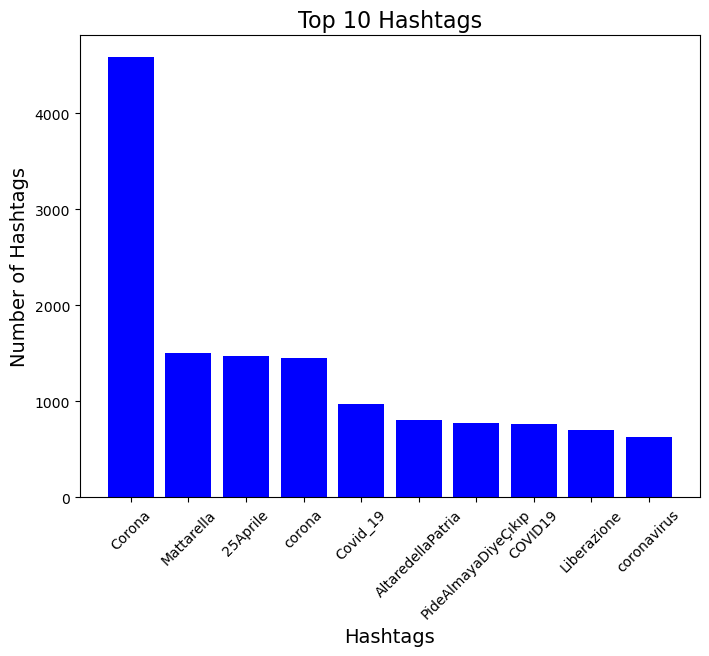

In [9]:
# Identify the top hashtags
top_hashtags = df_t.explode('hashtags')['hashtags'].value_counts().head(10)
# Plot the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(top_hashtags.index, top_hashtags.values, color='blue')
ax.set_title('Top 10 Hashtags', fontsize=16)
ax.set_xlabel('Hashtags', fontsize=14)
ax.set_ylabel('Number of Hashtags', fontsize=14)
ax.tick_params(axis='x', labelrotation=45)
plt.show()

In [10]:
# Identify the most frequent URLs
most_frequent_urls = df_t.explode('urls')['urls'].value_counts().head(10)
print('Most frequent URLs:\n', most_frequent_urls)

Most frequent URLs:
 https://t.co/YPcJXU1uqw    1474
https://t.co/fGIsLKzTkm     988
https://t.co/YKpVaB5ZMQ     294
https://t.co/pZ7OSbu0V1     178
https://t.co/WKkHMq5OtK     150
https://t.co/VLkciV1L8z     143
https://t.co/h8S1NnGQUC     142
https://t.co/uuUP7cI73J     134
https://t.co/fx17qyhqrX     131
https://t.co/n3c9AGDM5m     110
Name: urls, dtype: int64


In [11]:
# Identify the most prolific users
most_prolific_users = df_t['user'].value_counts().head(10)
print('Most prolific users:\n', most_prolific_users)

Most prolific users:
 1251917580618661888    295
1144669339599200256    271
1054988224232349696    131
1245997042385772546     85
1252818873578975232     75
1235265381901750274     62
1038062358              61
1249506057933565952     52
1246109039483707392     49
77838776                44
Name: user, dtype: int64


In [14]:
# Sort the dataframe by date
df_users_sorted = df_u.sort_values(by='date', ascending=False)

# Group the data by user and get the index of the latest date entry for each user
latest_date_indices = df_users_sorted.groupby('user')['date'].idxmax()

# Extract the latest date entry values for each user
df_users_latest = df_users_sorted.loc[latest_date_indices]

# Create a dataframe with historical entries by dropping the latest date entries
df_users_historical = df_users_sorted.drop(latest_date_indices)


In [15]:
most_followers_users = df_users_latest.nlargest(10, 'followers_count')['name'].tolist()
print('Users with most followers:', most_followers_users)


Users with most followers: ['detikcom', 'J.K. Rowling', 'AajTak', 'ABP News', 'TIMES NOW', 'Rajdeep Sardesai', 'Le Monde', 'tvOneNews', 'Kompas.com', 'NTV']


In [16]:
most_retweeted_tweets = df_t.sort_values('retweet_count', ascending=False).head(10)

In [18]:
most_retweeted_tweets['text']

0        É isto, ou vou morrer sem ar ou com o corona h...
67945    @narceducator @gtconway3d Never mind that he r...
67943    Es mag euch lächerlich und übertrieben erschei...
67942    TERKUAK! CHINA MAKIN SULIT UNTUK NGELAK. 🙈\n\n...
67941    Now Karbala is officially free of the #CoronaV...
67940                                                  Lol
67939    @RaMeR_31 @Gertel03119574 Gerade in der Corona...
67938    KIIT and KISS founder Dr. Achyuta Samanta has ...
67937    @Asknonym akuuuu!! fix habis corona sempro sel...
67936    #Spanien: Bereits den zweiten Tag in Folge wur...
Name: text, dtype: object

In [42]:
df_u.to_csv('users_df.csv', index=False)
df_t.to_csv('tweets_df.csv', index=False)